In [2]:
import pandas as pd
import seaborn as sns

In [3]:
uber_df = pd.read_csv('data/uber_requests.csv')

#### ❓Perform basic data exploration and in a markdown cell answer to these questions : 
* What is the name and type of data stored inthe columns of the dataset ?
* How many rows has the dataset ?
* Which columns have null values and how many null values do they have ? 
* What is the Status of 5 first rows ?

In [5]:
uber_df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [7]:
uber_df.shape

(6745, 6)

In [10]:
uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [11]:
uber_df['Status'].head(5)

0    Trip Completed
1    Trip Completed
2    Trip Completed
3    Trip Completed
4    Trip Completed
Name: Status, dtype: object

#### ❓What are the two possible Pickup point ? Prove it with a coding cell. 

In [17]:
 uber_df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

#### ❓Same question with Status

In [18]:
uber_df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

#### ❓ Create a new dataframe called uber_notcompleted_df with all trips except for the Completed ones ? (hint use the != "Trip Completed" comparison)

In [25]:
uber_notcompleted_df = uber_df[uber_df['Status']!='Trip Completed']
uber_notcompleted_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


#### ❓ How many rows has this new dataset ? Do you remember where you saw that number ? 

In [31]:
uber_notcompleted_df.shape[0] == uber_df['Drop timestamp'].isnull().sum()

True

#### ❓On the uber_df dataframe what column would you drop if you had to ? Go ahead and drop it !

In [48]:
uber_df.drop('Request id', axis='columns', inplace=True)

#### ❓Using Seaborn or Maplot, plot the number of trips for each status (bar chart)

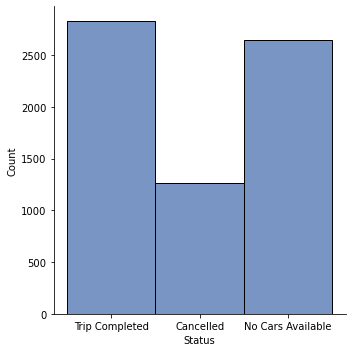

In [4]:
sns.set_palette('deep')
sns.displot(uber_df['Status'])


#### ❓Using Seaborn or Matplot,  plot the number of trips for each "Pickup point"

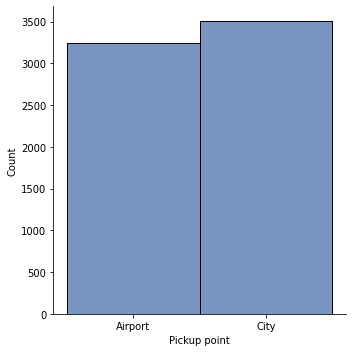

In [66]:
sns.displot(uber_df['Pickup point'])

#### ❓Using Seaborn plot the status of trips per Pickup Points (Meaning, for Airport, how many Cancelled, completed, and no car available)

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

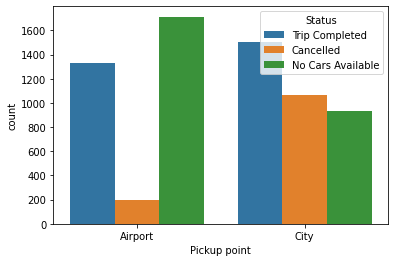

In [6]:
sns.countplot(data=uber_df, x='Pickup point', hue='Status')

#### ❓Create 2 new columns called Supply and Demand : 
* Supply is equal to 1 if Status is "Trip Completed". Otherwise it's 0
* Demand is equal to 1 no matter what
* After Check that the changes took effect

In [48]:
uber_df['Supply'] = 0
uber_df.loc[uber_df['Status']=='Trip Completed', 'Supply'] = 1
#uber_df.loc[uber_df['Status']!='Trip Completed', 'Supply'] = 0
uber_df


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Supply,Request Hour,Request Moment
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,1,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,1,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,1,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,1,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,1,8,Morning
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,0,23,Evening
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,0,23,Evening
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,0,23,Evening
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,0,23,Evening


In [49]:
uber_df['Demand'] = 1
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Supply,Request Hour,Request Moment,Demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,1,11,Morning,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,1,17,Afternoon,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,1,9,Morning,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,1,21,Evening,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,1,8,Morning,1
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,0,23,Evening,1
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,0,23,Evening,1
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,0,23,Evening,1
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,0,23,Evening,1


#### ❓Create the Gap column that is simply the difference of Demand and Supply. What does a Gap of 1 mean in real world ?

In [50]:
uber_df['Gap'] = uber_df['Demand']-uber_df['Supply']
uber_df


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Supply,Request Hour,Request Moment,Demand,Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,1,11,Morning,1,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,1,17,Afternoon,1,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,1,9,Morning,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,1,21,Evening,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,1,8,Morning,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,0,23,Evening,1,1
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,0,23,Evening,1,1
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,0,23,Evening,1,1
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,0,23,Evening,1,1


Answer : 

####  ❓[Optional] Play with the hours
The Goal is to transform the request time stamp into a more understandable data. We will try to transform the timestamps into these data "Morning" 'Afternoon', 'Evening', 'Night'

**First Step** : Transform the datatypes of Request timestamp and Drop timestamp into datetime object : 
Hint : Check the pd.to_datetime function(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

**Second Step** : Create a new column named "Request Hour" That only takes the hour of the request. 
Hint : Check the .dt function and the .hour function (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html)

**Third Step** : Create a new column named "Request moment" with these rules : 
* If Hour of request is between Midnight and 6 a.m it's the Night. 
* If Hour of request is between 6am and 12am it's the Morning. 
* If Hour of request is between 12am and 6pm it's the Afternoon. 
* If Hour of request is between 6pm and Midnight it's the Evening. 

In [42]:
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'])
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'])
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Supply
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,1
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,0


In [43]:
uber_df['Request Hour'] = uber_df['Request timestamp'].dt.hour
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Supply,Request Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,1,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,1,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,1,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,1,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,1,8
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,0,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,0,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,0,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,0,23


In [46]:
uber_df['Request Moment'] = 'Evening'
uber_df.loc[uber_df['Request Hour']<=18, 'Request Moment'] = 'Afternoon'
uber_df.loc[uber_df['Request Hour']<=12, 'Request Moment'] = 'Morning'
uber_df.loc[uber_df['Request Hour']<=6, 'Request Moment'] = 'Night'
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Supply,Request Hour,Request Moment
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,1,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,1,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,1,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,1,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,1,8,Morning
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,0,23,Evening
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,0,23,Evening
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,0,23,Evening
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,0,23,Evening


#### Using Seaborn Plot Trip Status for each moment of the day

<AxesSubplot:xlabel='Request Moment', ylabel='count'>

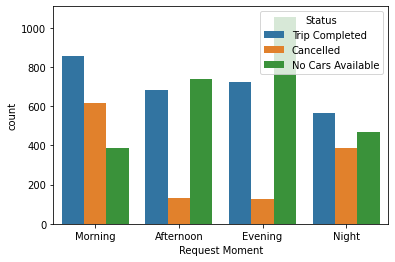

In [47]:
sns.countplot(data=uber_df, x='Request Moment', hue='Status')

#### Using Seaborn Plot the Supply Demand Gap for each moment of the day

<AxesSubplot:xlabel='Request Moment', ylabel='count'>

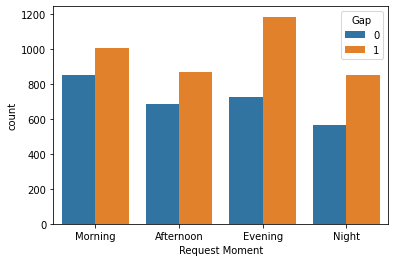

In [52]:
sns.countplot(data=uber_df, x='Request Moment', hue='Gap')